<a href="https://colab.research.google.com/github/VladislavBykovYl/PRIS/blob/main/%D0%9F%D0%A0%D0%98%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import sklearn.preprocessing as prepr
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro

from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
data.columns = names
data = data.drop(columns = ['Id'])
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
data['Class'].replace({1:'building_windows_float_processed',
2:'building_windows_non_float_processed', 3:'vehicle_windows_float_processed', 
4:'vehicle_windows_non_float_processed', 5:'containers', 6:'tableware', 7:'headlamps'}, inplace= True)
data['Class'].value_counts()

building_windows_non_float_processed    76
building_windows_float_processed        70
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: Class, dtype: int64

In [ ]:
for col in data.columns:
    fr = np.random.randint(5,10)/100
    data.loc[data.sample(frac=fr).index, col] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      201 non-null    float64
 1   Na      203 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      203 non-null    float64
 4   Si      195 non-null    float64
 5   K       201 non-null    float64
 6   Ca      197 non-null    float64
 7   Ba      203 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   201 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      201 non-null    float64
 1   Na      203 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      203 non-null    float64
 4   Si      195 non-null    float64
 5   K       201 non-null    float64
 6   Ca      197 non-null    float64
 7   Ba      203 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   201 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,201.000000,203.000000,203.000000,203.000000,195.000000,201.000000,197.000000,203.000000,201.000000
mean,1.518415,13.400049,2.662709,1.446256,72.636923,0.495473,8.946142,0.150394,0.059303
std,0.003023,0.821147,1.467689,0.493809,0.801907,0.650507,1.430950,0.442522,0.099587
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.915000,1.985000,1.190000,72.255000,0.130000,8.240000,0.000000,0.000000
50%,1.517690,13.290000,3.480000,1.380000,72.760000,0.560000,8.600000,0.000000,0.000000
75%,1.519260,13.805000,3.605000,1.635000,73.085000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,2.880000,0.510000


In [ ]:
data['Class'].describe()

count                                      201
unique                                       6
top       building_windows_non_float_processed
freq                                        71
Name: Class, dtype: object

In [ ]:
display(data['Class'].value_counts())
display(data['Class'].describe())

building_windows_non_float_processed    71
building_windows_float_processed        66
headlamps                               26
vehicle_windows_float_processed         17
containers                              12
tableware                                9
Name: Class, dtype: int64

count                                      201
unique                                       6
top       building_windows_non_float_processed
freq                                        71
Name: Class, dtype: object

In [ ]:
for col in data.columns:
    missing_values_counts = data[col].isna().sum()
    percentage = 100 * missing_values_counts / len(data[col])
    print("Coloumn", col, "contain", missing_values_counts, "NULL values (", percentage, "% )")

Coloumn RI contain 13 NULL values ( 6.074766355140187 % )
Coloumn Na contain 11 NULL values ( 5.140186915887851 % )
Coloumn Mg contain 11 NULL values ( 5.140186915887851 % )
Coloumn Al contain 11 NULL values ( 5.140186915887851 % )
Coloumn Si contain 19 NULL values ( 8.878504672897197 % )
Coloumn K contain 13 NULL values ( 6.074766355140187 % )
Coloumn Ca contain 17 NULL values ( 7.94392523364486 % )
Coloumn Ba contain 11 NULL values ( 5.140186915887851 % )
Coloumn Fe contain 13 NULL values ( 6.074766355140187 % )
Coloumn Class contain 13 NULL values ( 6.074766355140187 % )


#

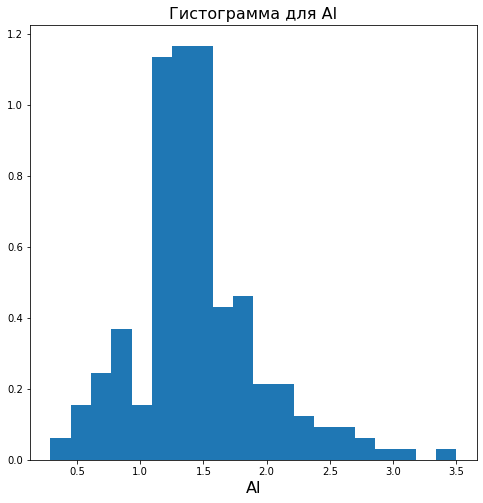

In [ ]:
col = "Al"

fig, ax = plt.subplots(figsize = (8, 8))

ax.hist(data[col], density = True, bins = 20)

ax.set_xlabel(col, fontsize=16)
ax.set_title("Гистограмма для " + col, fontsize=16)

plt.show()

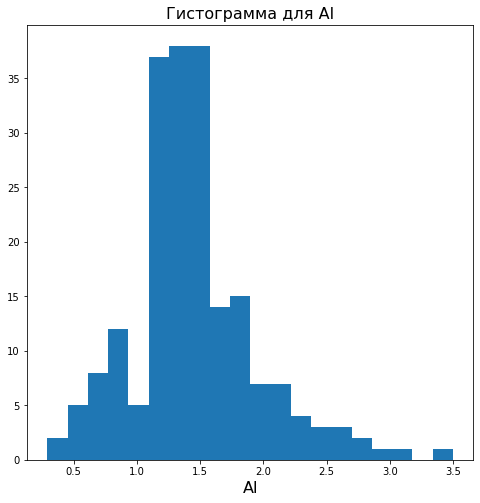

In [ ]:
ax = data["Al"].plot(kind="hist", bins = 20, figsize = (8,8))
ax.set_xlabel("Al", fontsize=16)
ax.set_ylabel(None)
ax.set_title("Гистограмма для Al", fontsize=16)
plt.show()


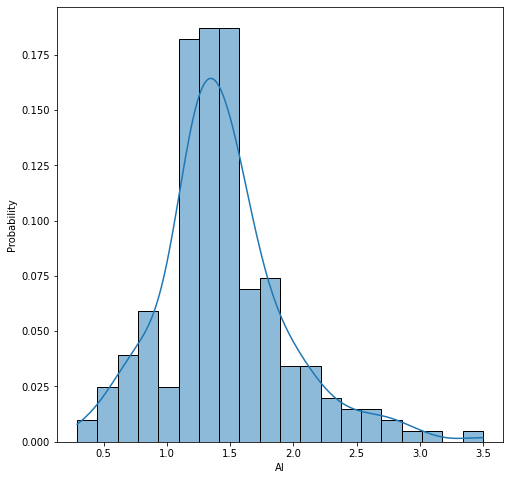

In [ ]:
plt.figure(figsize=(8, 8))
sns.histplot(data = data, x = "Al", bins=20, kde=True, stat="probability")
plt.show()

#


In [ ]:
df1 = data["Class"].value_counts()
df1

building_windows_non_float_processed    71
building_windows_float_processed        66
headlamps                               26
vehicle_windows_float_processed         17
containers                              12
tableware                                9
Name: Class, dtype: int64

In [ ]:
print(df1.index.values)
print(df1.values)

['building_windows_non_float_processed' 'building_windows_float_processed'
 'headlamps' 'vehicle_windows_float_processed' 'containers' 'tableware']
[71 66 26 17 12  9]


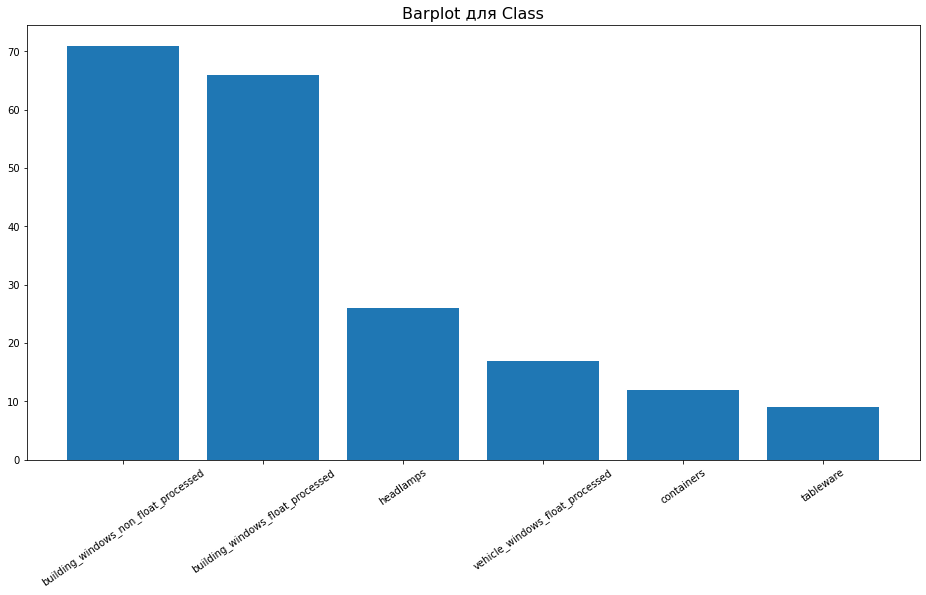

In [ ]:
col = "Class"

fig, ax = plt.subplots(figsize = (16, 8))

ax.bar(data[col].value_counts().index.values, data[col].value_counts().values)

ax.set_title("Barplot для " + col, fontsize=16)
ax.tick_params(axis="x", which="major", labelsize=10, rotation = 35)

plt.show()

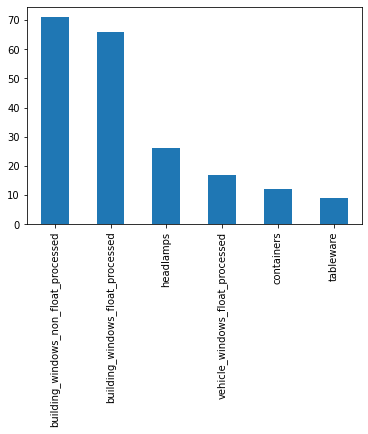

In [ ]:
data["Class"].value_counts().plot(kind="bar")

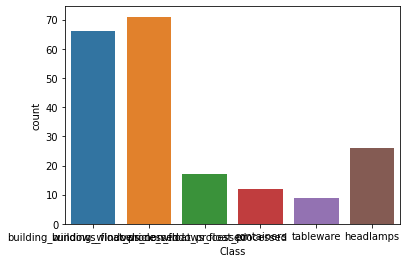

In [ ]:
sns.countplot(data = data, x = "Class")

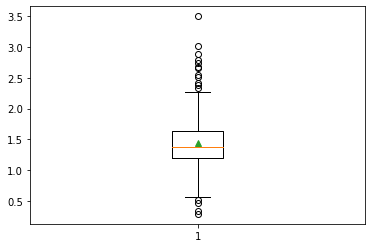

In [ ]:
col='Al'

fig, ax = plt.subplots()

data1 = data[col][~np.isnan(data[col])].copy()

ax.boxplot(data1, showmeans=True) 

plt.show()

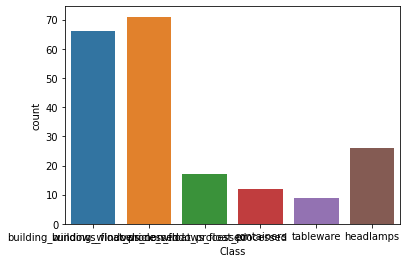

In [ ]:
sns.countplot(data = data, x = "Class")

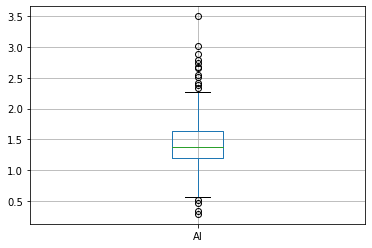

In [ ]:
data.boxplot(column=col)

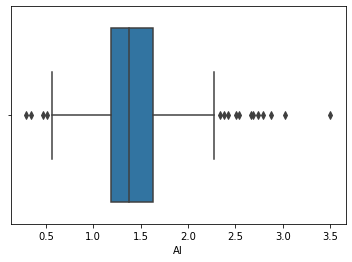

In [ ]:
sns.boxplot(data = data, x = col)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


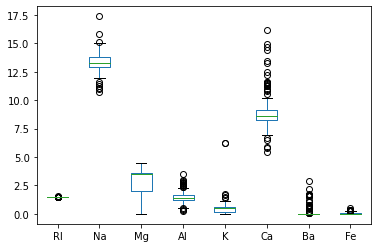

In [ ]:
data[data.columns.values[data.columns.values != "Si"]].plot(kind="box")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


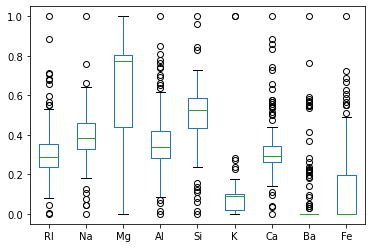

In [ ]:
pr = prepr.MinMaxScaler()
data1 = data[data.columns.values[data.columns.values != "Class"]]
pr.fit(data1) 
data1 = pr.transform(data1)

data1 = pd.DataFrame(data1)
names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
data1.columns = names

data1.plot(kind='box')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


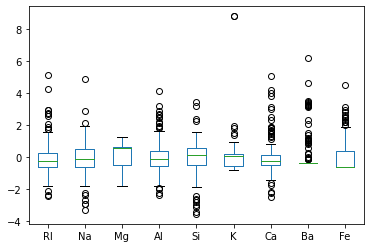

In [ ]:
pr = prepr.StandardScaler()
data1 = data[data.columns.values[data.columns.values != "Class"]]
pr.fit(data1) 
data1 = pr.transform(data1)

data1 = pd.DataFrame(data1)
names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
data1.columns = names

data1.plot(kind='box')
plt.show()

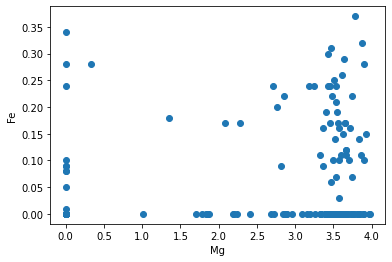

In [ ]:
col1 = 'Mg'
col2 = 'Fe'


fig, ax = plt.subplots()

ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)

plt.show()

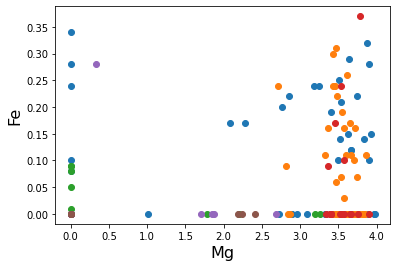

In [ ]:
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType], data[col2][data['Class']==glassType], label=glassType)

ax.set_xlabel(col1, fontsize=16)
ax.set_ylabel(col2, fontsize=16)
plt.show()

#Задание 3

In [ ]:
cols = data.columns
cols

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [ ]:
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    if col == "Class":
      ax.bar(data[col].value_counts().index.values, data[col].value_counts().values)
      ax.set_title("Barplot для " + col, fontsize=16)
      ax.tick_params(axis="x", which="major", labelsize=10, rotation = 35)
    else:
      ax.hist(data[col], density = True, bins = 20)
      ax.set_xlabel(col, fontsize=16)
      ax.set_title("Гистограмма для " + col, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [ ]:
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    data1 = data[col][~np.isnan(data[col])].copy()
    ax.boxplot(data1, showmeans=True) 
    ax.set_title(f"Ящик с усами, {col}", fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols[:-1]);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [ ]:
def showDiagramm(col1, col2):
    fig, ax = plt.subplots(figsize=(10,10))
    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[col1][data['Class']==glassType], data[col2][data['Class']==glassType], label=glassType)
    ax.set_xlabel(col1, fontsize=16)
    ax.set_ylabel(col2, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col1=cols[:-1], col2=cols[:-1]);

interactive(children=(Dropdown(description='col1', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe…

# Задание 4



In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()
data_fillna_mean['Class'].value_counts().index[0]
data_fillna_mean['Class'].mode()
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   201 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit( data_fillna_mean[data_fillna_mean.columns.values
                          [data_fillna_mean.columns.values != 'Class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

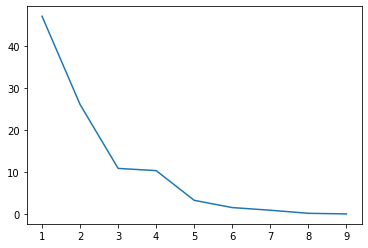

In [ ]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
pcaData=pd.DataFrame(
    pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']]))
pcaNames=[]
for i in range(9):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.495207,-1.084226,0.839244,-0.579602,-0.212876,-0.019988,0.064429,-0.013621,-0.000681
1,-0.724290,0.865063,0.054353,-0.253658,0.222234,-0.101742,0.354381,-0.052453,-0.000375
2,-0.653476,-0.373552,-0.214266,-0.317584,0.109455,-0.222591,-0.432978,-0.037743,0.000345
3,-0.793942,-0.686224,-0.030767,-0.035015,0.073635,-0.017184,-0.188976,-0.058533,0.000405
4,-1.303311,0.011239,-0.472072,-0.127875,0.162047,0.041164,0.009513,-0.054017,-0.000796


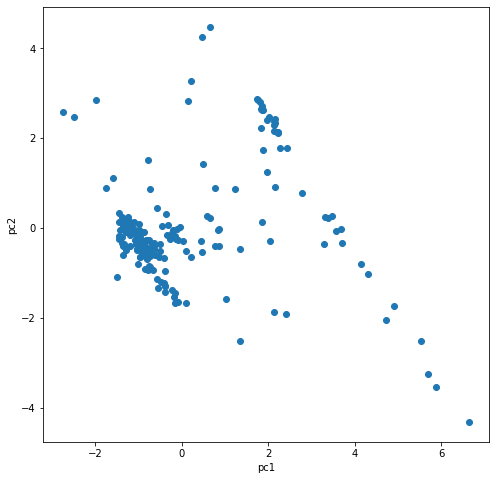

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(pcaData['pc1'], pcaData['pc2'])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

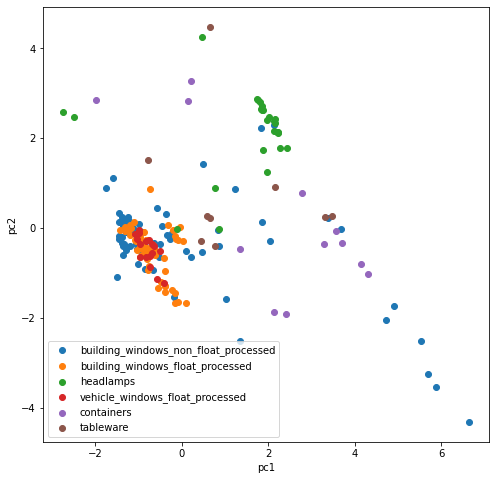

In [ ]:
pcaData['Class'] = data_fillna_mean['Class'].copy()
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['Class']==glassType ],
             pcaData[col2][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

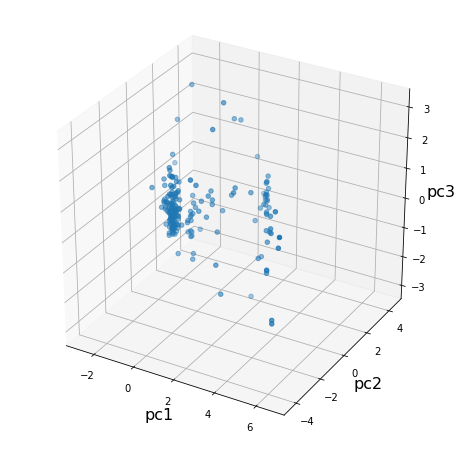

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(pcaData['pc1'], pcaData['pc2'], pcaData['pc3'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)

plt.show()

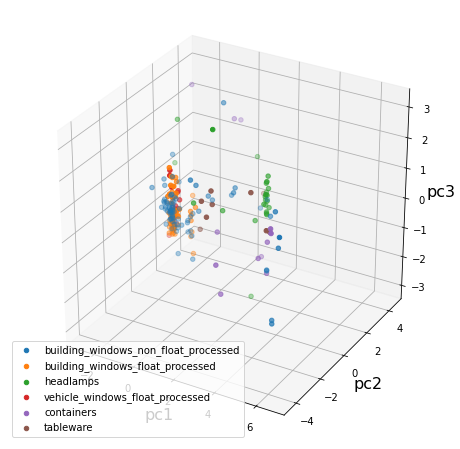

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['Class']==glassType ], 
             pcaData['pc2'][ pcaData['Class']==glassType ], 
             pcaData['pc3'][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

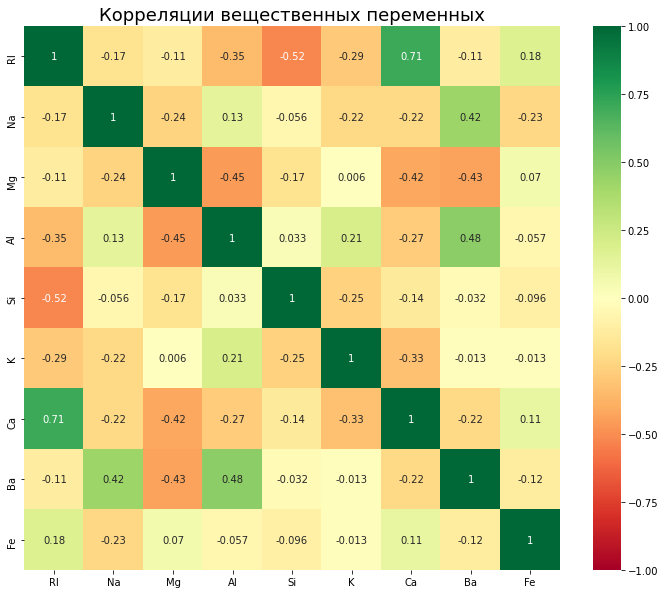

In [ ]:
corr = data_fillna_mean.corr()
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

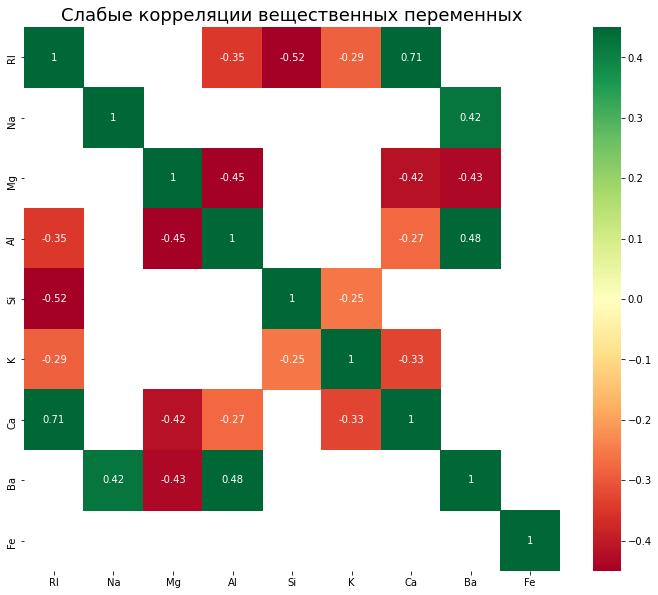

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.25)|(corr<=-0.25)], annot=True, vmax=0.45, vmin=-0.45, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize=18)

plt.show()

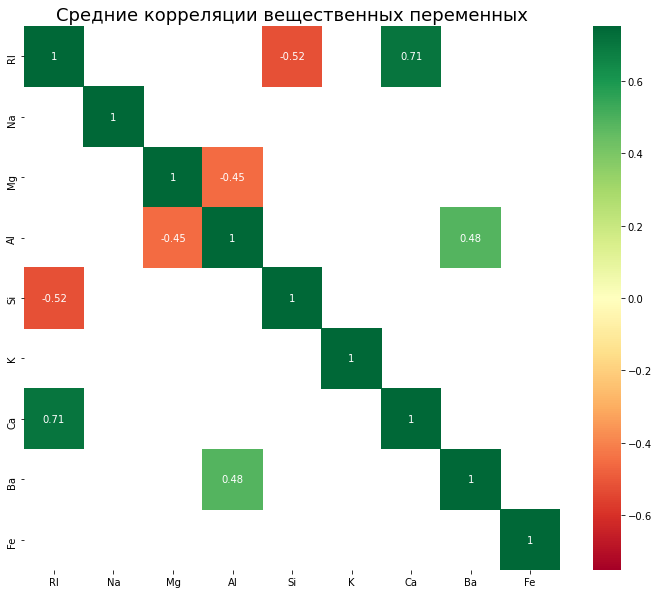

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr[(corr>=0.45)|(corr<=-0.45)], annot=True, vmax=0.75, vmin=-0.75, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize=18)

plt.show()